Nama anggota kelompok :

    1. M Puji Febrian  06.2018.1.07003
    
    
    2. Eri Rahmawati   06.2018.1.07057

In [12]:
import pandas as pd
import sqlite3
import math
import datetime
import numpy as np

1. PREPARE DATA

In [13]:
conn = sqlite3.connect('database.db')

In [14]:
c = conn.cursor()

In [15]:
c.executescript('drop table if exists alamat')
c.executescript('drop table if exists peminjam')
c.executescript('drop table if exists buku')
c.executescript('drop table if exists data_peminjaman')
c.execute("CREATE TABLE IF NOT EXISTS 'alamat' ('id_alamat' INT, 'provinsi' VARCHAR(255) NULL, 'kota_kab' VARCHAR(255) NULL, 'kecamatan' VARCHAR(255) NULL, 'kelurahan' VARCHAR(255) NULL, PRIMARY KEY ('id_alamat'))")
c.execute("CREATE TABLE IF NOT EXISTS 'buku' ('id_buku' INT, 'kategori_buku' VARCHAR(255) NULL, PRIMARY KEY ('id_buku'))")
c.execute("CREATE TABLE IF NOT EXISTS 'peminjam' ('id_peminjam' INT, 'kategori_peminjam' VARCHAR(255) NULL, 'jenis_kelamin' VARCHAR(255) NULL, 'alamat_id' INT NOT NULL, PRIMARY KEY ('id_peminjam'), FOREIGN KEY ('alamat_id') REFERENCES 'alamat' ('id_alamat') ON DELETE NO ACTION ON UPDATE NO ACTION)")
c.execute("CREATE TABLE IF NOT EXISTS 'data_peminjaman' ('id_peminjaman' INT, 'jumlah_peminjaman' INT NULL, 'bulan' VARCHAR(255) NULL, 'tahun' INT NULL, 'peminjam_id' INT NOT NULL, 'buku_id' INT NOT NULL, PRIMARY KEY ('id_peminjaman'), FOREIGN KEY ('peminjam_id') REFERENCES 'peminjam' ('id_peminjam') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('buku_id') REFERENCES 'buku' ('id_buku') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [16]:
data = pd.read_excel("perpustakaan.xlsx")
data

,provinsi,kota_kab,kecamatan,kelurahan,tahun,bulan,jumlah_peminjam,jenis_kelamin,kategori_buku,kategori_peminjam
0,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,Januari,15,laki-laki,Fiksi,Pelajar
1,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,Februari,8,laki-laki,Karya Umum,Pelajar
2,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,Maret,12,laki-laki,Filsafat dan Psikologi,Pelajar
3,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,April,4,laki-laki,Agama,Pelajar
4,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,Mei,16,laki-laki,Ilmu Sosial,Pelajar
5,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,Juni,6,laki-laki,Bahasa,Pelajar
6,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,Juli,9,laki-laki,Ilmu Murni,PNS/TNI/POLRI
7,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,Agustus,18,laki-laki,Ilmu Terapan,PNS/TNI/POLRI
8,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,September,3,laki-laki,Kesenian dan Olah Raga,PNS/TNI/POLRI
9,Jawa Timur,Kota Mojokerto,Magersari,Wates,2019,Oktober,6,laki-laki,Sastra,PNS/TNI/POLRI


In [23]:
alamat = data['kecamatan'].unique()
peminjam = data['kategori_peminjam'].unique()
buku = data['kategori_buku'].unique()
data_peminjaman= []
for i,j in data.iterrows():   
    al = -1
    for index, value in enumerate(alamat):
        if value == j[2]:
            al = index+1
            break
    
    pem = -1
    for index, value in enumerate(peminjam):
        if value == j[9]:
            pem = index+1
            break
        
    buk = -1
    for index, value in enumerate(buku):
        if value == j[8]:
            buk = index+1
    
    data_peminjaman.append([j[6],j[5],j[4], al, pem, buk])

In [24]:
c.execute("DELETE FROM ALAMAT")
for index, i in enumerate(alamat):
    c.execute("INSERT INTO ALAMAT VALUES ({},'{}','{}','{}','{}')".format(index, i[0],i[1],i[2],i[3]))

c.execute("DELETE FROM BUKU")
for index, i in enumerate(buku):
    c.execute("INSERT INTO BUKU VALUES ({},'{}')".format(index, i))

c.execute("DELETE FROM DATA_PEMINJAMAN")
for index, i in enumerate(data_peminjaman):
    c.execute("INSERT INTO DATA_PEMINJAMAN VALUES ({},'{}','{}','{}','{}','{}')".format(index, i[0],i[1],i[2],i[3],i[4]))

c.execute("DELETE FROM PEMINJAM")
for index, i in enumerate(peminjam):
    c.execute("INSERT INTO PEMINJAM VALUES ({},'{}','{}','{}')".format(index, i[0],i[1],i[2]))

In [25]:
c.execute('''SELECT * FROM ALAMAT''')
ALAMAT = []
for row in c.fetchall():
    ALAMAT.append(row)
print("========================ALAMAT==============================")
print(ALAMAT)
print("============================================================")

c.execute('''SELECT * FROM BUKU''')
BUKU = []
for row in c.fetchall():
    BUKU.append(row)
print("=========================BUKU===============================")
print(BUKU)
print("============================================================")

c.execute('''SELECT * FROM DATA_PEMINJAMAN''')
DATA_PEMINJAMAN = []
for row in c.fetchall():
    DATA_PEMINJAMAN.append(row)
print("====================DATA_PEMINJAMAN=========================")
print(DATA_PEMINJAMAN)
print("============================================================")

c.execute('''SELECT * FROM PEMINJAM''')
PEMINJAM = []
for row in c.fetchall():
    PEMINJAM.append(row)
print("========================PEMINJAM============================")
print(PEMINJAM)
print("============================================================")

========================ALAMAT==============================
[(0, 'M', 'a', 'g', 'e'), (1, 'P', 'r', 'a', 'j')]
=========================BUKU===============================
[(0, 'Fiksi'), (1, 'Karya Umum'), (2, 'Filsafat dan Psikologi'), (3, 'Agama'), (4, 'Ilmu Sosial'), (5, 'Bahasa'), (6, 'Ilmu Murni'), (7, 'Ilmu Terapan'), (8, 'Kesenian dan Olah Raga'), (9, 'Sastra'), (10, 'Sejarah dan Geografi')]
====================DATA_PEMINJAMAN=========================
[(0, 15, 'Januari', 2019, 1, 1), (1, 8, 'Februari', 2019, 1, 1), (2, 12, 'Maret', 2019, 1, 1), (3, 4, 'April', 2019, 1, 1), (4, 16, 'Mei', 2019, 1, 1), (5, 6, 'Juni', 2019, 1, 1), (6, 9, 'Juli', 2019, 1, 2), (7, 18, 'Agustus', 2019, 1, 2), (8, 3, 'September', 2019, 1, 2), (9, 6, 'Oktober', 2019, 1, 2), (10, 7, 'November', 2019, 1, 2), (11, 8, 'Desember', 2019, 1, 2), (12, 24, 'Januari', 2019, 1, 2), (13, 20, 'Februari', 2019, 1, 2), (14, 12, 'Maret', 2019, 1, 2), (15, 28, 'April', 2019, 1, 2), (16, 25, 'Mei', 2019, 1, 3), (17, 10,

2. visualisasi

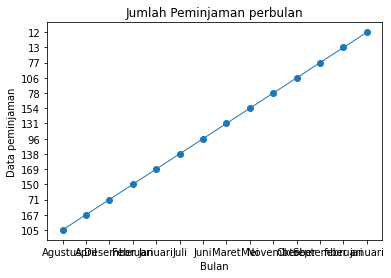

,Bulan,Data peminjaman
1,Agustus,105
2,April,167
3,Desember,71
4,Februari,150
5,Januari,169
6,Juli,138
7,Juni,96
8,Maret,131
9,Mei,154
10,November,78


In [31]:
c.execute('''SELECT bulan, sum(jumlah_peminjaman) as total
          FROM data_peminjaman
          group by bulan
          order by bulan ASC
          ''')
data_peminjaman = []
for row in c.fetchall():
    data_peminjaman.append(row)

np_peminjaman = np.array(data_peminjaman)
plt.plot([ str(x[0]) for x in np_peminjaman[:,:]], [ str(x[1]) for x in np_peminjaman[:,:]],'-o',linewidth=1.0)
plt.xticks([ str(x[0]) for x in np_peminjaman[:,:]], [ str(x[0]) for x in np_peminjaman[:,:]])
plt.yticks([ str(x[1]) for x in np_peminjaman[:,:]], [ str(x[1]) for x in np_peminjaman[:,:]])
plt.xlabel('Bulan')
plt.ylabel('Data peminjaman')
plt.title("Jumlah Peminjaman perbulan")
plt.show()

data = pd.DataFrame([ x for x in np_peminjaman[:,:]])
data.columns = ['Bulan', 'Data peminjaman']
data.index = np.arange(1,len(data)+1)
data

In [33]:
c.execute('''SELECT buku.kategori_buku, sum(data_peminjaman.jumlah_peminjaman) as total
          FROM data_peminjaman
          join buku on data_peminjaman.buku_id = buku.id_buku
          group by buku.kategori_buku
          order by buku.kategori_buku ASC
          ''')
data_peminjaman = []
for row in c.fetchall():
    data_peminjaman.append(row)
np_dtPeminjaman = np.array(data_peminjaman)
print("========================PEMINJAMAN PERBUKU================================")
data = pd.DataFrame([ x for x in np_dtPeminjaman[:,:]])
data.columns = ['buku', 'Data Peminjaman']
data.index = np.arange(1,len(data)+1)
data

========================PEMINJAMAN PERBUKU================================


,buku,Data Peminjaman
1,Agama,850
2,Filsafat dan Psikologi,135
3,Ilmu Sosial,349
4,Karya Umum,133
